In [1]:
# generate random objects of different signal absorption rate
# generate random lines between points outside of these objects (use border)
# draw lines between random lines based on the average signal absorption along the line

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
length = 100
min_size = 3
max_size = 20
min_absorption = 3
max_absorption = 20
n_objs = 100
n_lines = 100000

class Object:
    def __init__(self):
        self.x = random.randint(0, length)
        self.y = random.randint(0, length)
        self.size = random.randint(min_size, max_size)
        self.absorption = random.randint(min_absorption, max_absorption)

def get_pos(border, pos):
    if border == 0:
        return pos, 0
    if border == 1:
        return length-1, pos
    if border == 2:
        return pos, length-1
    return 0, pos
    
class Line:
    def __init__(self):
        borders = random.sample(range(-1, 3), 2)
        pos = (random.randint(0, length-1), random.randint(0, length-1))
        x0, y0 = get_pos(borders[0], pos[0])
        x1, y1 = get_pos(borders[1], pos[1])
        self.length = int(np.hypot(x1-x0, y1-y0))
        self.x, self.y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

In [4]:
random_objs = [Object() for i in range(n_objs)]
#print(random_objs)

In [5]:
random_lines = [Line() for i in range(n_lines)]
#print(random_lines)

In [6]:
gt = np.zeros(shape=(length, length), dtype=int)

In [7]:
for obj in random_objs:
    gt[int(obj.x-obj.size/2):int(obj.x+obj.size/2), int(obj.y-obj.size/2):int(obj.y+obj.size/2)] = obj.absorption

In [8]:
res = np.zeros(shape=(length, length), dtype=float)
counts = np.zeros(shape=(length, length), dtype=float)

for line in random_lines:
    values = gt[line.x.astype(int), line.y.astype(int)]
    res[line.x.astype(int), line.y.astype(int)] += np.average(values)
    counts[line.x.astype(int), line.y.astype(int)] += 1

res[counts > 0] = res[counts > 0] / counts[counts > 0]

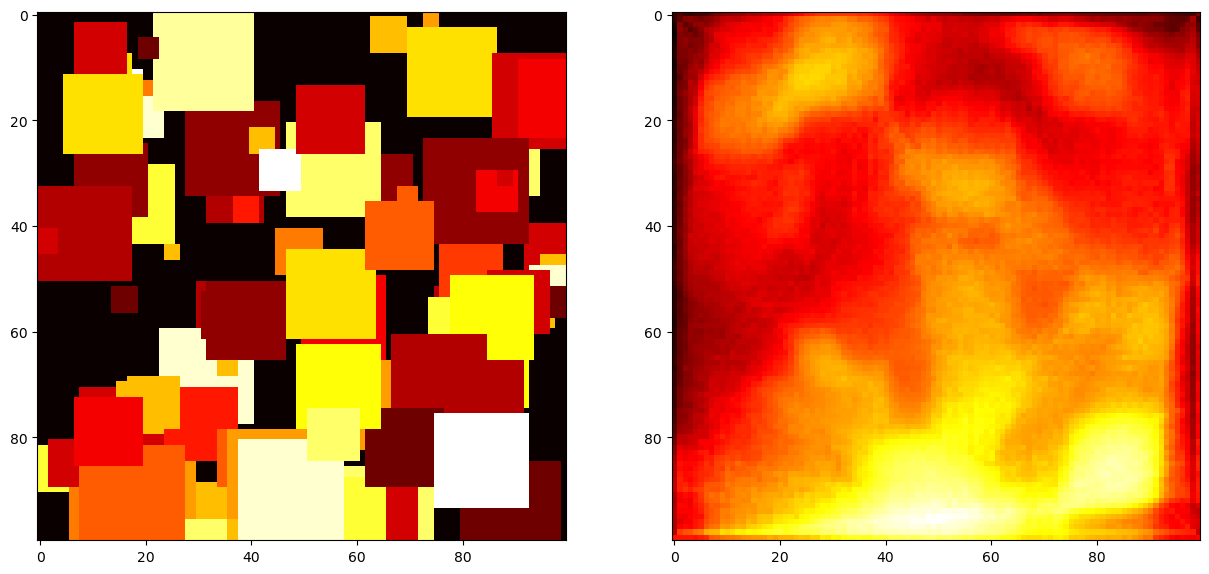

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
im0 = axes[0].imshow(gt, cmap='hot')
im1 = axes[1].imshow(res, cmap='hot')
plt.show()